In [294]:

import numpy as np

import scipy.stats as stats
import constants as c



# Define .txt file names

In [375]:

case1_evolved_familiar = '10x75_tactile_2/case1_10x75/familiarFits_full.txt'
case2_evolved_familiar = '10x75_tactile_2/case2_10x75/familiarFits.txt'
case3_evolved_familiar = '10x75_tactile_2/case3_10x75/familiarFits.txt'

case1_evolved_foreign = '10x75_tactile_2/case1_10x75/foreignFits_full.txt'
case2_evolved_foreign = '10x75_tactile_2/case2_10x75/foreignFits.txt'
case3_evolved_foreign = '10x75_tactile_2/case3_10x75/foreignFits.txt'

#-------

case1_random_familiar = '10x75_tactile_2/case1_1x0/familiarFits_full.txt'
case2_random_familiar = '10x75_tactile_2/case2_1x0/familiarFits.txt'
case3_random_familiar = '10x75_tactile_2/case3_1x0/familiarFits.txt'

case1_random_foreign = '10x75_tactile_2/case1_1x0/foreignFits_full.txt'
case2_random_foreign = '10x75_tactile_2/case2_1x0/foreignFits.txt'
case3_random_foreign = '10x75_tactile_2/case3_1x0/foreignFits.txt'


# Get list of swarm fitnesses for analysis

In [376]:
import numpy as np
from itertools import islice

def Get_Swarm_Fits(fitnessFile, botsPerSwarm, numLinesToRead=None):
    '''
    Parameters:
        - fitnessFile: txt file where each line is a number
        - botsPerSwarm: integer number of bots in each swarm
        - numLinesToRead: optional parameter specifying the number of lines to read from the file

    Returns:
        - None
    '''

    # Read nums from the file
    with open(fitnessFile, 'r') as file:
        lines_to_read = file if numLinesToRead is None else islice(file, numLinesToRead)
        numbers = [float(line.strip()) for line in lines_to_read]   

    # transform data from (-)=more fit to (+)=more fit
    numbers = [num*-1 for num in numbers]

    # check if the length of the list is divisible by botsPerSwarm
    if len(numbers) % botsPerSwarm != 0:
        raise ValueError("Length of the list is not divisible by botsPerSwarm")

    # compute avg of every <botsPerSwarm> lines
    bestOfEachSwarm = [np.max(numbers[i:i+botsPerSwarm]) for i in range(0, len(numbers), botsPerSwarm)]

    return bestOfEachSwarm



    


In [377]:
# Use function on each .txt file to get a list of swarm fitnesses for each file

case1_evolved_familiar = Get_Swarm_Fits(case1_evolved_familiar, c.botsPerSwarm, 300)
case2_evolved_familiar = Get_Swarm_Fits(case2_evolved_familiar, c.botsPerSwarm, 300)
case3_evolved_familiar = Get_Swarm_Fits(case3_evolved_familiar, c.botsPerSwarm, 300)

case1_evolved_foreign = Get_Swarm_Fits(case1_evolved_foreign, c.botsPerSwarm, 300)
case2_evolved_foreign = Get_Swarm_Fits(case2_evolved_foreign, c.botsPerSwarm, 300)
case3_evolved_foreign = Get_Swarm_Fits(case3_evolved_foreign, c.botsPerSwarm, 300)

#-------

case1_random_familiar = Get_Swarm_Fits(case1_random_familiar, c.botsPerSwarm, 300)
case2_random_familiar = Get_Swarm_Fits(case2_random_familiar, c.botsPerSwarm, 300)
case3_random_familiar = Get_Swarm_Fits(case3_random_familiar, c.botsPerSwarm, 300)

case1_random_foreign = Get_Swarm_Fits(case1_random_foreign, c.botsPerSwarm, 300)
case2_random_foreign = Get_Swarm_Fits(case2_random_foreign, c.botsPerSwarm, 300)
case3_random_foreign = Get_Swarm_Fits(case3_random_foreign, c.botsPerSwarm, 300)


# Perform Shapiro-Wilks test to determine if data is normally distributed

In [378]:
from scipy.stats import shapiro

def Check_Normal_Distribution(data):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)
    
    # Check the p-value
    alpha = 0.05                        # significance level
    if p_value > alpha:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")


In [379]:
## Use function on each "average swarm" list


## Check if case1 swarm fitnesses are normally distributed
Check_Normal_Distribution(case1_evolved_foreign)
Check_Normal_Distribution(case1_evolved_familiar)


## Check if case2 swarm fitnesses are normally distributed
Check_Normal_Distribution(case2_evolved_foreign)
Check_Normal_Distribution(case2_evolved_familiar)


## Check if case3 swarm fitnesses are normally distributed
Check_Normal_Distribution(case3_evolved_foreign)
Check_Normal_Distribution(case3_evolved_familiar)




The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed


# Perform Mann Whitney U Test (We perform this instead of t-test because data is not all normally distributed)

In [380]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(list1, list2, alpha=0.05):
    """
    Perform Mann-Whitney U test to determine if there is a significant difference between two lists.

    Parameters:
        - list1: First list of values
        - list2: Second list of values
        - alpha: Significance level for the test (default is 0.05)

    Returns:
        - None
    """

    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(list1, list2)

    # Check if the result is significant
    is_significant = p_value < alpha

    # Print information
    print(f"t statistic: {statistic:.5f}, p-value: {p_value},  alpha: {alpha}, {'significant' if is_significant else 'not significant'}")



# Perfom MW U Test on (all evolved foreign data)
To determine which swarm does better when evolved and deployed to a cluttered environment

In [381]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_foreign, case2_evolved_foreign, 0.05/3)              Josh said we don't need this. We just care about how case3 does relative to others


print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_foreign, case3_evolved_foreign, 0.05/2)


print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_foreign, case3_evolved_foreign, 0.05/2)





----case1 vs case3----
t statistic: 36.00000, p-value: 9.75550113457629e-10,  alpha: 0.025, significant
----case2 vs case3----
t statistic: 290.00000, p-value: 0.0183679594713855,  alpha: 0.025, significant


# Perform MW U Test on (all evolved familiar data)
To determine which swarm does better when evolved and deployed to an empty environment

In [382]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_familiar, case2_evolved_familiar, 0.05/3)


print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_familiar, case3_evolved_familiar, 0.05/2)


print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_familiar, case3_evolved_familiar, 0.05/2)



----case1 vs case3----
t statistic: 26.00000, p-value: 3.8201597819993253e-10,  alpha: 0.025, significant
----case2 vs case3----
t statistic: 292.00000, p-value: 0.01988307641391072,  alpha: 0.025, significant


# Perfom MW U Test (evolved_foreign vs random_foreign)
To show that bots were evolved enough that they do better than a random bot in the foreign environment

In [383]:
mann_whitney_u_test(case1_evolved_foreign, case1_random_foreign, 0.05)        # What should significance level be? 0.5?
mann_whitney_u_test(case2_evolved_foreign, case2_random_foreign, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_random_foreign, 0.05)



t statistic: 795.00000, p-value: 3.520057626068007e-07,  alpha: 0.05, significant
t statistic: 888.00000, p-value: 9.918628618948002e-11,  alpha: 0.05, significant
t statistic: 888.00000, p-value: 9.918628618948002e-11,  alpha: 0.05, significant


# Perform MW U Test (evolved_foreign vs evolved_familiar)
To show that foreign environment is hard enough to pose a significant challenge relative to the familiar environment

In [384]:
mann_whitney_u_test(case1_evolved_foreign, case1_evolved_familiar, 0.05)
mann_whitney_u_test(case2_evolved_foreign, case2_evolved_familiar, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_evolved_familiar, 0.05)



t statistic: 94.00000, p-value: 1.473317499078265e-07,  alpha: 0.05, significant
t statistic: 42.00000, p-value: 1.6947244610469585e-09,  alpha: 0.05, significant
t statistic: 64.00000, p-value: 1.2023264598302062e-08,  alpha: 0.05, significant


# Generate box plots

In [385]:
import matplotlib.pyplot as plt

def side_by_side_box_plots(*lists, labels=None, yaxis=(-4, 12)):
    """
    Generate side-by-side box plots

    Parameters:
    - *lists: variable number of lists to plot.
    - labels: pptional list of labels for each box plot.

    Returns:
    - None 
    """
    # Check if labels are provided, otherwise use default labels
    if labels is None:
        labels = [f'Case {i+1}' for i in range(len(lists))]

    # Create side-by-side box plots
    plt.boxplot(lists, labels=labels)

    # Add labels and title
    plt.ylim(yaxis)
    plt.xlabel('')
    plt.ylabel('Average Swarm Fitness')
    plt.title('')

    # Show the plot
    plt.show()


# Generate box plot (all evolved foreign data)

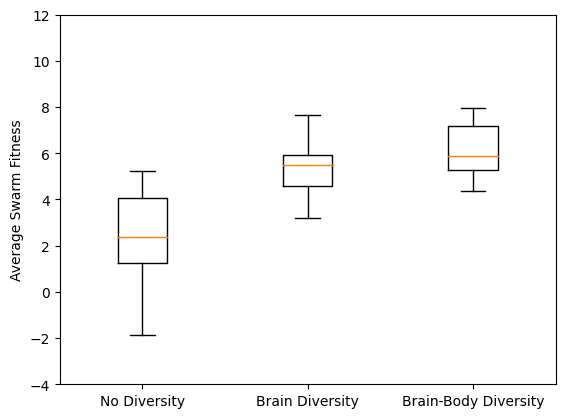

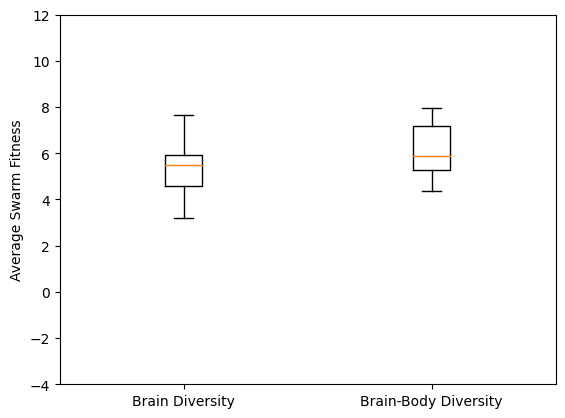

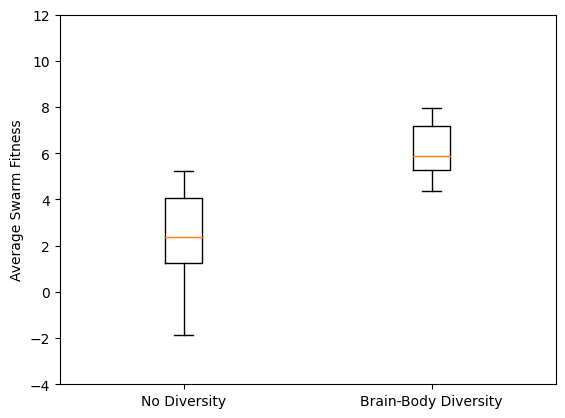

In [386]:
# Box plot for case1_evolved_foregin vs case2_evolved_foreign vs case3_evolved_foreign
side_by_side_box_plots(case1_evolved_foreign,case2_evolved_foreign ,case3_evolved_foreign, labels=['No Diversity', 'Brain Diversity', 'Brain-Body Diversity'])
side_by_side_box_plots(case2_evolved_foreign ,case3_evolved_foreign, labels=['Brain Diversity', 'Brain-Body Diversity'])
side_by_side_box_plots(case1_evolved_foreign ,case3_evolved_foreign, labels=['No Diversity', 'Brain-Body Diversity'])

# Generate box plot (all evolved familiar data)
To determine which swarm does best when evolved and deployed to an empty environment

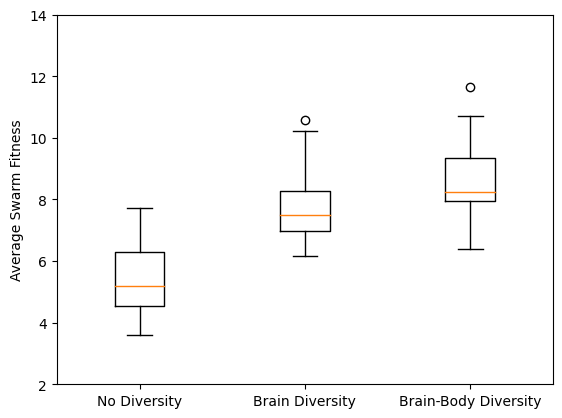

In [387]:
side_by_side_box_plots(case1_evolved_familiar,case2_evolved_familiar ,case3_evolved_familiar, labels=['No Diversity', 'Brain Diversity', 'Brain-Body Diversity'], yaxis=(2, 14))

# Generate box plot (evolved_foreign vs random_foreign)

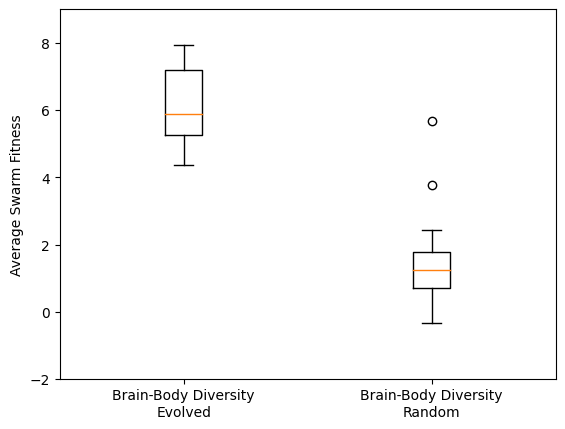

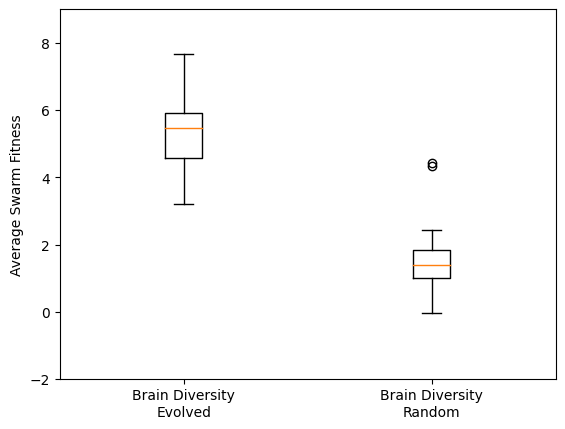

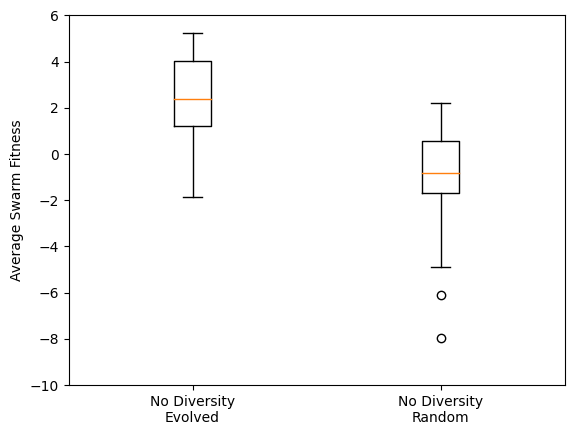

In [388]:
side_by_side_box_plots(case3_evolved_foreign,case3_random_foreign, labels=['Brain-Body Diversity\nEvolved', 'Brain-Body Diversity\nRandom'], yaxis= (-2, 9))
side_by_side_box_plots(case2_evolved_foreign,case2_random_foreign, labels=['Brain Diversity\nEvolved', 'Brain Diversity\nRandom'], yaxis= (-2, 9))
side_by_side_box_plots(case1_evolved_foreign,case1_random_foreign, labels=['No Diversity\nEvolved', 'No Diversity\nRandom'], yaxis= (-10, 6))





# Generate box plot (evolved_foreign vs evolved_familiar)
To show that environment provides significant challenge

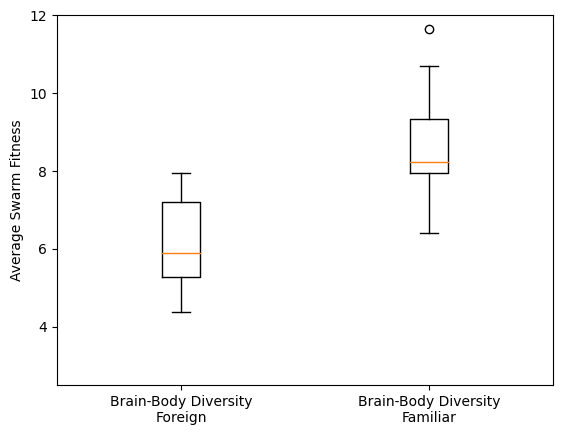

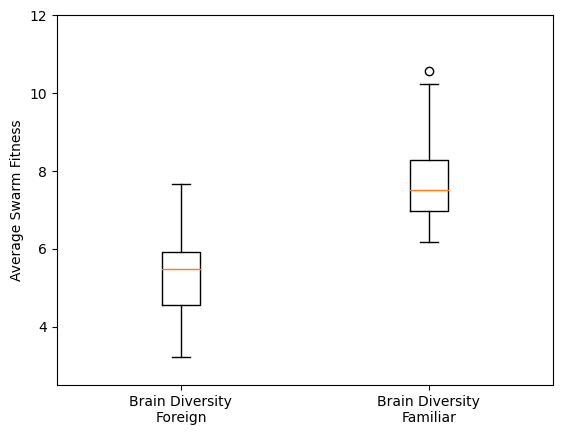

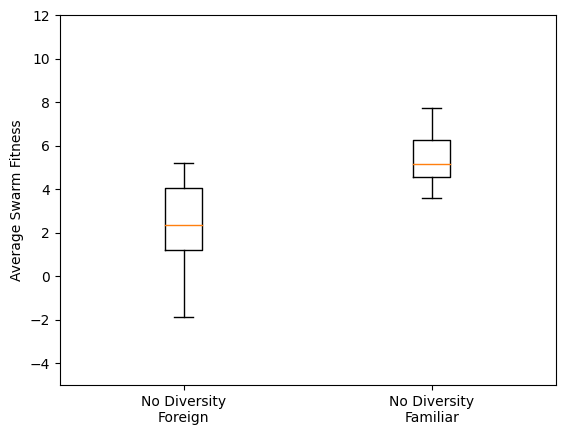

In [389]:
side_by_side_box_plots(case3_evolved_foreign,case3_evolved_familiar, labels=['Brain-Body Diversity\nForeign', 'Brain-Body Diversity\nFamiliar'], yaxis= (2.5, 12))
side_by_side_box_plots(case2_evolved_foreign,case2_evolved_familiar, labels=['Brain Diversity\nForeign', 'Brain Diversity\nFamiliar'], yaxis= (2.5, 12))
side_by_side_box_plots(case1_evolved_foreign,case1_evolved_familiar, labels=['No Diversity\nForeign', 'No Diversity\nFamiliar'], yaxis= (-5, 12))
